In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.linear_model as skl
import sklearn.model_selection as skm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
#!pip install ISLP
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

print("Importing libraries... Done!")

Importing libraries... Done!


In [231]:
df_train_org = pd.read_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\train.csv")
df_train_org.head()

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born,Kiss_index
0,6089360076,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.917
1,6191773043,2,1.0,27.0,Norway,France,NaN,NaN,NaN,NaN,...,274.708499,-1.490820,-13.601394,10.961671,1132.641854,10.326206,12.461674,2.539051,24.367000,0.990
2,6180369987,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,0.078
3,6157791024,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,...,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606,1.000
4,6174818440,2,1.0,23.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,...,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345,0.451


In [232]:
if 0:
    df_train_org = pd.read_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\train_cleaned.csv")
    df_train_org.head()

In [233]:
df_test_org = pd.read_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\test.csv")
df_test_org.head()

,ID,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,...,prec_mean_anual_Res,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born
0,6386533568,2,1,25,Germany,Chile,-0.87,50200,27.0,0.97,...,837.165363,30.629372,8.964064,-2.221096,22.129606,2048.469449,64.990759,8.136417,-0.079881,16.925589
1,6089268910,2,1,21,American Samoa,New Zealand,0.27,14500,53.5,0.98,...,5657.832667,0.000000,26.025991,24.732492,27.350933,1751.037183,23.705176,10.076406,1.863378,18.815927
2,6550809117,2,1,31,Australia,Australia,-0.25,49900,30.3,1.01,...,497.546254,0.038584,21.818885,8.770489,34.536445,497.546254,0.038584,21.818885,8.770489,34.536445
3,6434867455,1,2,31,Australia,Australia,-0.25,49900,30.3,1.01,...,497.546254,0.038584,21.818885,8.770489,34.536445,497.546254,0.038584,21.818885,8.770489,34.536445
4,6430313808,2,1,24,Australia,Australia,-0.25,49900,30.3,1.01,...,497.546254,0.038584,21.818885,8.770489,34.536445,497.546254,0.038584,21.818885,8.770489,34.536445


In [234]:
df_train = df_train_org.copy()
df_test = df_test_org.copy()
df_train.shape, df_test.shape

((1406, 45), (938, 44))

In [235]:
df_test.isna().sum()

ID                           0
Sex                          0
SexPref                      0
Age                          0
Country_Res                  0
Country_Born                 0
HPP_9                        0
GDP                          0
GINI                         0
SexRatio.2017est.            0
SexRatio.15.54.              0
UNRegion                     0
RelStatus                    0
RelLength                    0
RelY                         0
RelM                         0
Ethnicity                    1
SRA                          0
SRM                          0
SRH                          0
SRA_Partner                  0
SRM_Partner                  0
SRH_Partner                  0
Hug_Freq                     0
Sex_Freq                     0
Hug_Satis                    0
Sex_Satis                    0
GK_Breath                    0
GK_Scent                     0
GK_Taste                     0
GK_Wet                       0
GK_Contact                   0
GK_Arous

In [236]:
if 0:
    df_test = df_test.dropna()
    df_test.isna().sum()


In [237]:
if 1:
    df_train = df_train.dropna()
    df_train.shape


In [238]:
df_train.isna().sum()

ID                           0
Sex                          0
SexPref                      0
Age                          0
Country_Res                  0
Country_Born                 0
HPP_9                        0
GDP                          0
GINI                         0
SexRatio.2017est.            0
SexRatio.15.54.              0
UNRegion                     0
RelStatus                    0
RelLength                    0
RelY                         0
RelM                         0
Ethnicity                    0
SRA                          0
SRM                          0
SRH                          0
SRA_Partner                  0
SRM_Partner                  0
SRH_Partner                  0
Hug_Freq                     0
Sex_Freq                     0
Hug_Satis                    0
Sex_Satis                    0
GK_Breath                    0
GK_Scent                     0
GK_Taste                     0
GK_Wet                       0
GK_Contact                   0
GK_Arous

In [239]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


print("Importing libraries... Done!")

Importing libraries... Done!


In [240]:
X_train = df_train.drop(columns=["Kiss_index", "ID"])
X_test = df_test.drop(columns=["ID"])
X_train.shape, X_test.shape

((469, 43), (938, 43))

In [241]:
y_train = df_train['Kiss_index']
y_train, y_train.shape

(0       0.917
 2       0.078
 3       1.000
 5       0.757
 7       0.177
         ...  
 1380    0.653
 1386    0.987
 1387    0.743
 1395    0.598
 1398    0.420
 Name: Kiss_index, Length: 469, dtype: float64,
 (469,))

In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 1398
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         469 non-null    int64  
 1   Sex                        469 non-null    int64  
 2   SexPref                    469 non-null    float64
 3   Age                        469 non-null    float64
 4   Country_Res                469 non-null    object 
 5   Country_Born               469 non-null    object 
 6   HPP_9                      469 non-null    float64
 7   GDP                        469 non-null    float64
 8   GINI                       469 non-null    float64
 9   SexRatio.2017est.          469 non-null    float64
 10  SexRatio.15.54.            469 non-null    float64
 11  UNRegion                   469 non-null    float64
 12  RelStatus                  469 non-null    float64
 13  RelLength                  469 non-null    float64
 14

In [243]:
cat_cols = X_train.select_dtypes(include=["object"]).columns
num_cols = X_train.select_dtypes(exclude=["object"]).columns
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: Index(['Country_Res', 'Country_Born', 'Ethnicity'], dtype='object')
Numerical columns: Index(['Sex', 'SexPref', 'Age', 'HPP_9', 'GDP', 'GINI', 'SexRatio.2017est.',
       'SexRatio.15.54.', 'UNRegion', 'RelStatus', 'RelLength', 'RelY', 'RelM',
       'SRA', 'SRM', 'SRH', 'SRA_Partner', 'SRM_Partner', 'SRH_Partner',
       'Hug_Freq', 'Sex_Freq', 'Hug_Satis', 'Sex_Satis', 'GK_Breath',
       'GK_Scent', 'GK_Taste', 'GK_Wet', 'GK_Contact', 'GK_Arous',
       'GK_SynchStyle', 'prec_mean_anual_Res', 'snow_cover_days_Res',
       't_mean_Res', 't_mean_coldest_month_Res', 't_mean_warmest_month_Res',
       'prec_mean_anual_Born', 'snow_cover_days_Born', 't_mean_Born',
       't_mean_coldest_month_Born', 't_mean_warmest_month_Born'],
      dtype='object')


In [244]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
lambdas = 10**np.linspace(8, -2, 100)
ridge = RidgeCV(alphas=lambdas, store_cv_values=True)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [245]:
X_test.shape

(938, 43)

In [246]:
submission_ridge = pd.DataFrame({
    "ID": df_test["ID"],
    "Kiss_index": y_pred_ridge
})
submission_ridge.head()

,ID,Kiss_index
0,6386533568,0.657188
1,6089268910,0.659447
2,6550809117,0.647239
3,6434867455,0.654939
4,6430313808,0.650176


In [247]:
submission_ridge.to_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\submission_ridge.csv", index=False)

In [248]:
print("Model trained successfully!")
print("Best lambda chosen by cross-validation:", ridge_pipeline.named_steps["ridge"].alpha_)

Model trained successfully!
Best lambda chosen by cross-validation: 7220.809018385471


In [249]:
submission_ridge.shape

(938, 2)

## Using sklearn.linear_model.ElasticNet.path

In [250]:
X_processed = preprocessor.fit_transform(X_train)
X_processed

<469x232 sparse matrix of type '<class 'numpy.float64'>'
	with 20167 stored elements in Compressed Sparse Row format>

In [251]:
X_dense = X_processed.toarray()  # Convert sparse to dense
Xs_train = X_dense - X_dense.mean(axis=0)[None, :]
Xs_train /= X_dense.std(axis=0)[None, :]
Xs_train.shape

(469, 232)

In [252]:
X_dense.shape

(469, 232)

In [253]:
coeffs = skl.ElasticNet.path(Xs_train, 
                             y_train.values, 
                             l1_ratio=0., 
                             alphas=lambdas)[1]
coeffs

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115.57327391507081, tolerance: 0.023114654800000002
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning

array([[-1.87940423e-10, -2.37153915e-10, -2.99254299e-10, ...,
        -1.97657185e-02, -2.01266216e-02, -2.04260359e-02],
       [ 9.97832145e-12,  1.25912132e-11,  1.58883084e-11, ...,
        -1.84890440e-02, -1.87120449e-02, -1.88940397e-02],
       [-3.90303415e-12, -4.92507203e-12, -6.21473846e-12, ...,
        -2.38440962e-02, -2.43166915e-02, -2.47052415e-02],
       ...,
       [ 5.99684618e-11,  7.56716153e-11,  9.54867471e-11, ...,
         7.24579908e-03,  7.31622940e-03,  7.37398860e-03],
       [ 4.08297975e-11,  5.15213609e-11,  6.50125836e-11, ...,
         4.77674922e-03,  4.83184844e-03,  4.87875287e-03],
       [-1.04779000e-10, -1.32216101e-10, -1.66837795e-10, ...,
        -9.63713887e-03, -9.62804169e-03, -9.62021089e-03]])

In [254]:
coeffs.shape

(232, 100)

In [255]:
design = MS(df_train.columns.drop(["Kiss_index", "ID"])).fit(df_train)
design

ModelSpec(terms=Index(['Sex', 'SexPref', 'Age', 'Country_Res', 'Country_Born', 'HPP_9', 'GDP',
       'GINI', 'SexRatio.2017est.', 'SexRatio.15.54.', 'UNRegion', 'RelStatus',
       'RelLength', 'RelY', 'RelM', 'Ethnicity', 'SRA', 'SRM', 'SRH',
       'SRA_Partner', 'SRM_Partner', 'SRH_Partner', 'Hug_Freq', 'Sex_Freq',
       'Hug_Satis', 'Sex_Satis', 'GK_Breath', 'GK_Scent', 'GK_Taste', 'GK_Wet',
       'GK_Contact', 'GK_Arous', 'GK_SynchStyle', 'prec_mean_anual_Res',
       'snow_cover_days_Res', 't_mean_Res', 't_mean_coldest_month_Res',
       't_mean_warmest_month_Res', 'prec_mean_anual_Born',
       'snow_cover_days_Born', 't_mean_Born', 't_mean_coldest_month_Born',
       't_mean_warmest_month_Born'],
      dtype='object'))

In [256]:
D = design.fit_transform(df_train)
D = D.drop(columns=["intercept"])
D.head()

,Sex,SexPref,Age,Country_Res,Country_Born,HPP_9,GDP,GINI,SexRatio.2017est.,SexRatio.15.54.,...,prec_mean_anual_Res,snow_cover_days_Res,t_mean_Res,t_mean_coldest_month_Res,t_mean_warmest_month_Res,prec_mean_anual_Born,snow_cover_days_Born,t_mean_Born,t_mean_coldest_month_Born,t_mean_warmest_month_Born
0,2,1.0,42.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,1.04,...,1207.852988,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345
2,2,1.0,28.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,1.03,...,837.165363,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606
3,2,3.0,22.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,1.03,...,837.165363,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606
5,2,1.0,23.0,Germany,Germany,-0.870000,50200.0,27.0,0.97,1.03,...,837.165363,30.629372,8.964064,-2.221096,22.129606,837.165363,30.629372,8.964064,-2.221096,22.129606
7,2,1.0,32.0,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...,-1.063333,43600.0,32.4,0.99,1.04,...,1207.852988,1.168566,9.187962,1.301625,18.040345,1207.852988,1.168566,9.187962,1.301625,18.040345


In [257]:
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_features = num_cols.tolist() + cat_features.tolist()
print(all_features, len(all_features))

['Sex', 'SexPref', 'Age', 'HPP_9', 'GDP', 'GINI', 'SexRatio.2017est.', 'SexRatio.15.54.', 'UNRegion', 'RelStatus', 'RelLength', 'RelY', 'RelM', 'SRA', 'SRM', 'SRH', 'SRA_Partner', 'SRM_Partner', 'SRH_Partner', 'Hug_Freq', 'Sex_Freq', 'Hug_Satis', 'Sex_Satis', 'GK_Breath', 'GK_Scent', 'GK_Taste', 'GK_Wet', 'GK_Contact', 'GK_Arous', 'GK_SynchStyle', 'prec_mean_anual_Res', 'snow_cover_days_Res', 't_mean_Res', 't_mean_coldest_month_Res', 't_mean_warmest_month_Res', 'prec_mean_anual_Born', 'snow_cover_days_Born', 't_mean_Born', 't_mean_coldest_month_Born', 't_mean_warmest_month_Born', 'Country_Res_Australia', 'Country_Res_Brazil', 'Country_Res_Chile', 'Country_Res_Colombia', 'Country_Res_Czechia', 'Country_Res_France', 'Country_Res_Germany', 'Country_Res_India', 'Country_Res_Nigeria', 'Country_Res_Poland', 'Country_Res_United Kingdom of Great Britain and Northern Ireland', 'Country_Res_United States of America', 'Country_Born_Australia', 'Country_Born_Brazil', 'Country_Born_Chile', 'Country

In [258]:
coeffs_path = pd.DataFrame(coeffs.T,
                           columns = all_features,
                           index = -np.log(lambdas))
coeffs_path.index.name = '-log(lambda)'
coeffs_path.head()

,Sex,SexPref,Age,HPP_9,GDP,GINI,SexRatio.2017est.,SexRatio.15.54.,UNRegion,RelStatus,...,Ethnicity_ninguna,Ethnicity_pardo,Ethnicity_polak,Ethnicity_polskie,Ethnicity_s?owianie,Ethnicity_scottish,Ethnicity_west slavic- czech,Ethnicity_white,Ethnicity_white central european,Ethnicity_yoruba
-log(lambda),,,,,,,,,,,,,,,,,,,,,
-18.420681,-1.879404e-10,9.978321e-12,-3.903034e-12,-1.882354e-10,1.585820e-10,-1.191357e-10,1.460471e-10,1.541140e-10,1.760423e-10,1.869452e-10,...,-1.305207e-10,-9.368500e-11,-9.368500e-11,4.312034e-12,1.591658e-10,-1.412968e-10,3.482055e-11,5.996846e-11,4.082980e-11,-1.047790e-10
-18.188096,-2.371539e-10,1.259121e-11,-4.925072e-12,-2.375261e-10,2.001078e-10,-1.503322e-10,1.842906e-10,1.944698e-10,2.221402e-10,2.358981e-10,...,-1.646985e-10,-1.182171e-10,-1.182171e-10,5.441169e-12,2.008445e-10,-1.782963e-10,4.393854e-11,7.567162e-11,5.152136e-11,-1.322161e-10
-17.955512,-2.992543e-10,1.588831e-11,-6.214738e-12,-2.997239e-10,2.525074e-10,-1.896977e-10,2.325483e-10,2.453930e-10,2.803091e-10,2.976696e-10,...,-2.078259e-10,-1.491730e-10,-1.491730e-10,6.865976e-12,2.534370e-10,-2.249844e-10,5.544415e-11,9.548675e-11,6.501258e-11,-1.668378e-10
-17.722928,-3.776161e-10,2.004877e-11,-7.842114e-12,-3.782086e-10,3.186282e-10,-2.393713e-10,2.934427e-10,3.096509e-10,3.537100e-10,3.756165e-10,...,-2.622466e-10,-1.882350e-10,-1.882350e-10,8.663878e-12,3.198012e-10,-2.838981e-10,6.996259e-11,1.204906e-10,8.203658e-11,-2.105254e-10
-17.490343,-4.764975e-10,2.529868e-11,-9.895632e-12,-4.772451e-10,4.020632e-10,-3.020523e-10,3.702827e-10,3.907350e-10,4.463313e-10,4.739742e-10,...,-3.309176e-10,-2.375256e-10,-2.375256e-10,1.093257e-11,4.035434e-10,-3.582388e-10,8.828277e-11,1.520419e-10,1.035184e-10,-2.656529e-10


In [259]:
zoomed_path = coeffs_path[(coeffs_path.index < -1) & (coeffs_path.index > -4)]

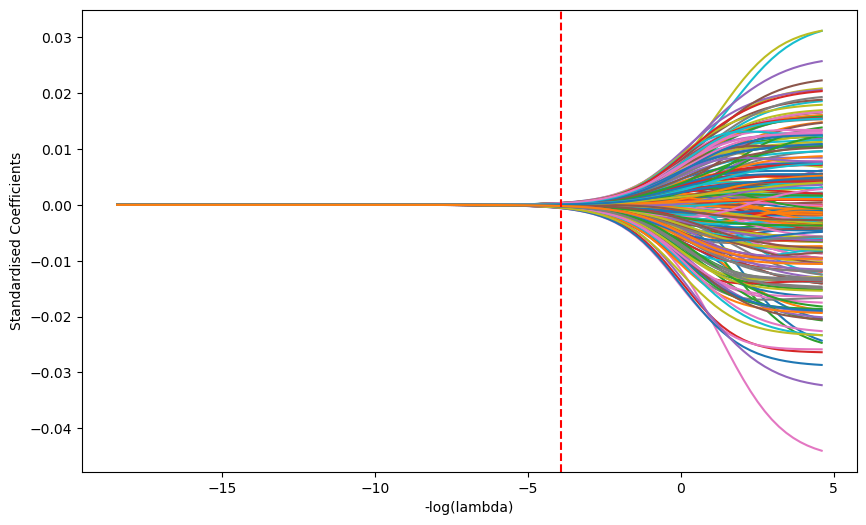

In [260]:
chosen_lambda = 50
neglog_lambda = -np.log(chosen_lambda)


path_fig, ax = plt.subplots(figsize=(10, 6))
coeffs_path.plot(ax=ax, legend=False)
ax.axvline(x=neglog_lambda, color='red', linestyle='--', label=f'Chosen λ = {chosen_lambda}')

ax.set_xlabel('-log(lambda)')
ax.set_ylabel('Standardised Coefficients')
#ax.legend(all_features, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [261]:
neglog_lambda

-3.912023005428146

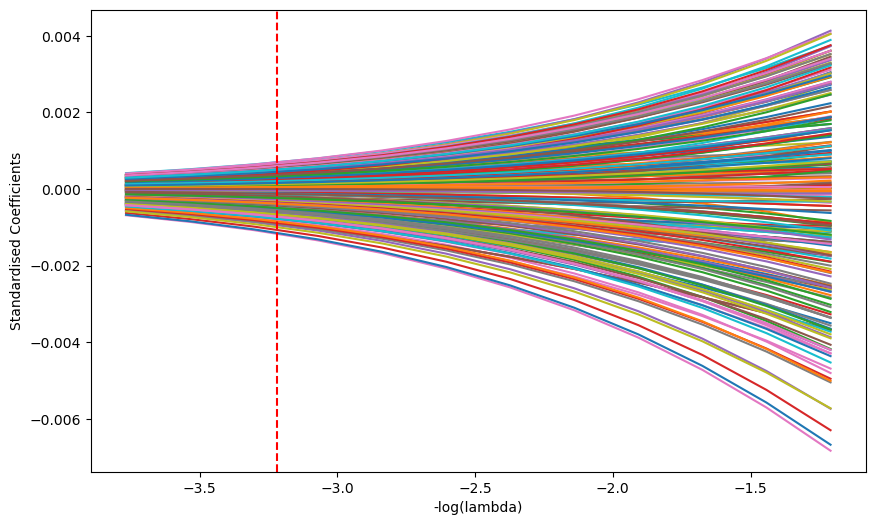

In [262]:
chosen_lambda = 25
neglog_lambda = -np.log(chosen_lambda)


path_fig, ax = plt.subplots(figsize=(10, 6))
zoomed_path.plot(ax=ax, legend=False)
ax.axvline(x=neglog_lambda, color='red', linestyle='--', label=f'Chosen λ = {chosen_lambda}')

ax.set_xlabel('-log(lambda)')
ax.set_ylabel('Standardised Coefficients')
#ax.legend(all_features, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Left side (high λ): Most coefficients are close to zero. This is strong regularization—both Ridge and Lasso shrink coefficients.
- Right side (low λ): Coefficients grow, and more features become influential. Lasso may set some coefficients exactly to zero, while Ridge keeps them small but non-zero.


- On the far left (high λ): all coefficients near zero → too much regularization.
- In the middle: a few lines start to diverge → good candidate region.
- On the far right (low λ): many lines diverge wildly → overfitting risk.


 Pick a λ in the middle zone, where:
- A few features have meaningful coefficients.
- Most others are still suppressed.
- The model is expressive but not overfit.

25-35




In [263]:
zoomed_choices = coeffs_path[(coeffs_path.index < -3.2) & (coeffs_path.index > -3.5) ]
zoomed_choices

,Sex,SexPref,Age,HPP_9,GDP,GINI,SexRatio.2017est.,SexRatio.15.54.,UNRegion,RelStatus,...,Ethnicity_ninguna,Ethnicity_pardo,Ethnicity_polak,Ethnicity_polskie,Ethnicity_s?owianie,Ethnicity_scottish,Ethnicity_west slavic- czech,Ethnicity_white,Ethnicity_white central european,Ethnicity_yoruba
-log(lambda),,,,,,,,,,,,,,,,,,,,,
-3.302698,-0.000652,0.000013,-0.000055,-0.00045,0.000369,-0.000256,0.000365,0.000387,0.000449,0.000645,...,-0.000452,-0.000325,-0.000338,0.000002,0.000554,-0.000509,0.000119,0.000193,0.000146,-0.000351


In [264]:
zoomed_choices.index

Index([-3.3026978101530755], dtype='float64', name='-log(lambda)')

In [265]:
beta_hat = zoomed_choices.loc[zoomed_choices.index[0]]
beta_hat

Sex                                -0.000652
SexPref                             0.000013
Age                                -0.000055
HPP_9                              -0.000450
GDP                                 0.000369
                                      ...   
Ethnicity_scottish                 -0.000509
Ethnicity_west slavic- czech        0.000119
Ethnicity_white                     0.000193
Ethnicity_white central european    0.000146
Ethnicity_yoruba                   -0.000351
Name: -3.3026978101530755, Length: 232, dtype: float64

In [266]:
np.linalg.norm(beta_hat)

0.006364262976008964

In [267]:
ridge = skl.ElasticNet(alpha=chosen_lambda, l1_ratio=0)

In [268]:
validation = skm.ShuffleSplit(n_splits=5,
                              test_size=0.2,
                              random_state=42)
ridge.alpha = chosen_lambda
results = skm.cross_validate(ridge, 
                             Xs_train, 
                             y_train, 
                             cv=validation, 
                             return_train_score=True, 
                             scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+01, tolerance: 2.338e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+01, tolerance: 2.307e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

array([0.06480965, 0.06837151, 0.06550911, 0.05719987, 0.05624885])

In [269]:
lambda_opt = ridge_pipeline.named_steps["ridge"].alpha_
lambda_opt

7220.809018385471

In [270]:

ridge.alpha = lambda_opt
results = skm.cross_validate(ridge, 
                             Xs_train, 
                             y_train, 
                             cv=validation, 
                             return_train_score=True, 
                             scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.169e+01, tolerance: 2.338e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+01, tolerance: 2.307e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

array([0.06535394, 0.06898737, 0.06556619, 0.05690022, 0.05638253])

In [271]:
ridge = skl.ElasticNet(alpha=chosen_lambda, l1_ratio=0.)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge)
])
pipe.fit(X_train, y_train)

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.697937970813957, tolerance: 0.002952096143283582
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Sex', 'SexPref', 'Age', 'HPP_9', 'GDP', 'GINI', 'SexRatio.2017est.',
       'SexRatio.15.54.', 'UNRegion', 'RelStatus', 'RelLength', 'RelY', 'RelM',
       'SRA', 'SRM', 'SRH', 'SRA_Partner', 'SRM_Partner', 'SRH_Partner',
       'Hug_Freq', 'Sex_Freq', 'Hug_Satis', 'Sex_Satis', 'GK_Breath',
       'GK_Sce...
       't_mean_Res', 't_mean_coldest_month_Res', 't_mean_warmest_month_Res',
       'prec_mean_anual_Born', 'snow_cover_days_Born', 't_mean_Born',
       't_mean_coldest_month_Born', 't_mean_warmest_month_Born'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country_Res', 'Country_Born', 'Ethnicity'], dtype='object'))])),
                ('ridge', ElasticNet(alpha=25, l1_ratio=0.0))])

In [ ]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.689115966399282, tolerance: 0.0023378231957333333
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\ngocn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.53522220805834, tolerance: 0.0023070444437333338
  model = cd_fast.sparse_enet_coordinate_descent(


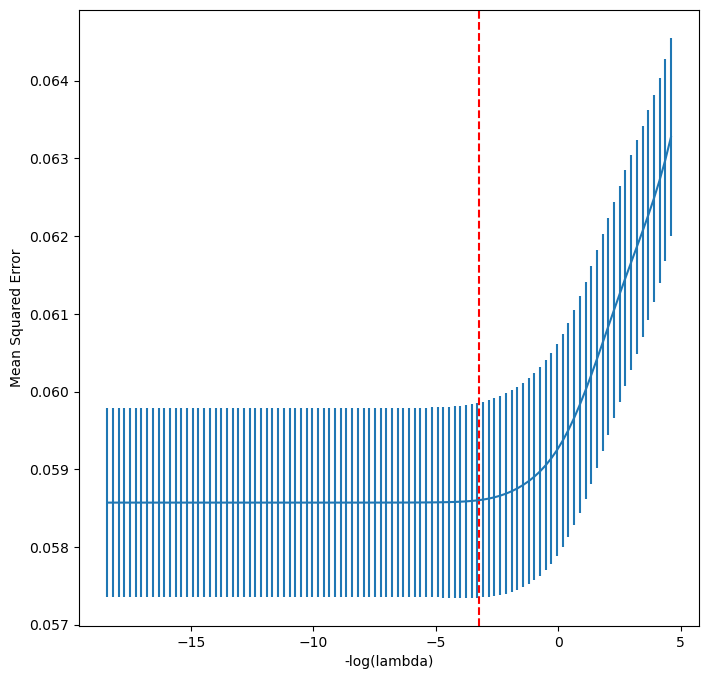

In [ ]:
ridge_fig, ax = plt.subplots(figsize=(8, 8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(5))
ax.axvline(x=neglog_lambda, color='red', linestyle='--', label=f'Chosen λ = {chosen_lambda}')
ax.set_xlabel('-log(lambda)')
ax.set_ylabel('Mean Squared Error')
plt.show()

In [ ]:
y_pred_ridge = grid.predict(X_test)
y_pred_ridge

array([0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363808,
       0.66363808, 0.66363808, 0.66363808, 0.66363808, 0.66363

In [ ]:
submission_ridge = pd.DataFrame({
    "ID": df_test["ID"],
    "Kiss_index": y_pred_ridge
})
submission_ridge.head()

,ID,Kiss_index
0,6386533568,0.663638
1,6089268910,0.663638
2,6550809117,0.663638
3,6434867455,0.663638
4,6430313808,0.663638


In [ ]:
submission_ridge.to_csv(r"C:\Users\ngocn\OneDrive\Documents\MATH LU\BERN02---Computational-Science-Reproducible-Data-Science-and-Statistical-Learning\BERNO2-kissing-challenge-2025\Data\submission_ridge02.csv", index=False)

In [ ]:
print("Model trained successfully!")
print("Best lambda chosen by cross-validation:", grid.best_params_['ridge__alpha'])

Model trained successfully!
Best lambda chosen by cross-validation: 100000000.0
